## Comparing DLC Camera CSV 3D coordinate Data to Autobender/Rotary Encoder

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from config import path_to_repository
from analysis import DLC3DBendAngles
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [148]:
#load rotary encoder csv, camera 3d data form DLC csv, and flir_data.mat with timestamps from python camera acquisition
trial_string = "06_49" # choose from 24_57, 29_07, 31_23, 33_22, 35_22, 37_05
suffix = "_R"
# REMEMBER to change valley and peak ranges/inte-peak distance below based on trial

signed_angles = False # whether to compute signed angles (True) or unsigned angles (False)

# renc = os.path.join(path_to_repository , f'/Volumes/ExtremeSSD/SNEL/camera_data/09_09_SEN1_cleaned/sensor_data/2025_09_09_12_{trial_string}{suffix}/data_rotenc_2025_09_09_12_{trial_string}{suffix}.csv')
# df_renc = pd.read_csv(renc)  
# cam = os.path.join(path_to_repository , '/Volumes/ExtremeSSD/SNEL/camera_data/8.22 calib/videos_and_analyzed_3D/2025_08_20_18_24_57_DLC_3D.csv')
cam = os.path.join(path_to_repository , f'/Volumes/ExtremeSSD/SNEL/camera_data/09_09_SEN1-2025-09-15/SEN1_DLC_3D_preds/2025_09_09_13_{trial_string}{suffix}_DLC_3D.csv')
cam_timestamp = os.path.join(
    path_to_repository,
    f'/Volumes/ExtremeSSD/SNEL/camera_data/09_09_SEN1_raw/2025_09_09_13_{trial_string}/flir_data.mat'
)

temp_save_dir = os.path.join(path_to_repository , '/Users/phily/Developer/sensorimotor-lab/Strain-Sensor-/Code/analysis/temp_plots')
if not os.path.exists(temp_save_dir):
    os.makedirs(temp_save_dir)
    


In [149]:
#load DLC 3d coordinates from DLC triangulation
cam = DLC3DBendAngles(cam)

# Load only variables starting with 'ts' -> timestamp data
df_ts = cam.load_mat_as_df(cam_timestamp, prefix="ts")

In [150]:
#check number of rows from  cam dataframe (taken from DLC csv) and df_ts dataframe (timestamps form flir_data.mat file).  They hopefully are the same.  If not, need to determine which frames dropped.
rows_renc, rows_cam = DLC3DBendAngles.compare_row_counts(cam.df, df_ts)

DataFrame 1: 198 rows
DataFrame 2: 198 rows


In [151]:
#add camera timestamp columns to 3d dlc data
cam.add_dataframe(df_ts)

scorer     DLC_3D                                                       \
    bodyparts        PIP                             MCP                        
       coords          x         y          z          x         y          z   
0           0 -24.434486  4.390534  36.820866 -22.661062  2.543744  38.046005   
1           1 -24.434500  4.390525  36.820873 -22.661066  2.543727  38.046030   
2           2 -24.433796  4.390474  36.818620 -22.660320  2.543866  38.049026   
3           3 -24.433193  4.390298  36.818344 -22.658297  2.543894  38.048020   
4           4 -24.432800  4.389837  36.819244 -22.657848  2.544563  38.051690   
..        ...        ...       ...        ...        ...       ...        ...   
193       193 -24.690530  4.537311  36.814445 -22.813496  2.757685  37.935665   
194       194 -24.691399  4.539011  36.815910 -22.814613  2.761604  37.933220   
195       195 -24.692873  4.542066  36.816753 -22.813908  2.762788  37.930720   
196       196 -24.695368  4.546079  36.817596 -22.819395  2.765919  37.937485   
197       197 -24.695522  4.552919  36.813698 -22.813380  2.777595  37.940033   

                                                                      \
          hand                      radial-styloid-process             
             x         y          z                      x         y   
0   -21.071820  1.121587  41.183690             -19.752960 -0.680060   
1   -21.071848  1.121636  41.183495             -19.752975 -0.680058   
2   -21.074127  1.119104  41.186687             -19.752756 -0.680029   
3   -21.075450  1.120017  41.184780             -19.752743 -0.680030   
4   -21.076927  1.116496  41.187910             -19.752579 -0.680103   
..         ...       ...        ...                    ...       ...   
193 -21.022760  1.391487  41.056545             -19.474049 -0.264164   
194 -21.023514  1.392731  41.054493             -19.474695 -0.261346   
195 -21.021425  1.398044  41.048763             -19.475315 -0.260636   
196 -21.021809  1.399355  41.050694             -19.476650 -0.259755   
197 -21.023466  1.401308  41.044880             -19.476763 -0.254578   

                                                 ts_25183199   ts_25185174  
                  forearm                                                   
             z          x         y          z                              
0    42.750603 -18.120361 -2.354064  44.444200  130658831414  130658842955  
1    42.750610 -18.121132 -2.354296  44.441677  130658880799  130658891769  
2    42.752020 -18.121357 -2.354532  44.443510  130658930230  130658941188  
3    42.752747 -18.120630 -2.354531  44.444710  130658980894  130658992507  
4    42.753445 -18.120127 -2.354414  44.447980  130659030742  130659041565  
..         ...        ...       ...        ...           ...           ...  
193  42.641030 -17.801619 -1.797989  44.353092  130708605661  130708616797  
194  42.639996 -17.803688 -1.796055  44.350094  130708658894  130708669968  
195  42.640648 -17.802517 -1.793247  44.346350  130708706279  130708717483  
196  42.642630 -17.805105 -1.787819  44.344276  130708756536  130708767923  
197  42.643560 -17.804956 -1.787716  44.343903  130708806923  130708818315  

[198 rows x 18 columns]

## Bend Angle obtained from Dot Product Formula

## $\theta = \cos^{-1} \left( \frac{\mathbf{v}_1 \cdot \mathbf{v}_2}{\|\mathbf{v}_1\| \, \|\mathbf{v}_2\|} \right)$

As an example:  

V1 is vector from hand to MCP (vector obtained from subtracting 2 xyz points from triangulated DLC csv data)

V2 is vector from MCP to PIP (vector obtained from subtracting 2 xyz points from triangulated DLC csv data)


In [152]:
#Calculte bend angles from DLC 3d trianglulated data

# --- MCP bend ---
hand_pts = cam.get_points("hand")
mcp_pts  = cam.get_points("MCP")
pip_pts  = cam.get_points("PIP")

v1_mcp = cam.vector(hand_pts, mcp_pts)  # hand→MCP
v2_mcp = cam.vector(mcp_pts, pip_pts)   # MCP→PIP
ref = np.array([0,0,1])
angles_mcp = cam.angle_from_vectors(v1_mcp, v2_mcp, signed_angles, ref)

# --- Wrist angle ---
forearm_pts = cam.get_points("forearm")
hand_pts = cam.get_points("hand")
mcp_pts = cam.get_points("MCP")

v1_wrist = cam.vector(forearm_pts, hand_pts)  # forearm→hand
v2_wrist = cam.vector(hand_pts, mcp_pts)      # hand→MCP
angles_wrist = cam.angle_from_vectors(v1_wrist, v2_wrist)

# --- Add both angles to a copy of the DataFrame ---
df_out = cam.df.copy()
df_out[("metric", "mcp_bend_deg", "deg")]   = angles_mcp
df_out[("metric", "wrist_bend_deg", "deg")] = angles_wrist

cam.add_dataframe(df_out)



scorer     DLC_3D                                                       \
    bodyparts        PIP                             MCP                        
       coords          x         y          z          x         y          z   
0           0 -24.434486  4.390534  36.820866 -22.661062  2.543744  38.046005   
1           1 -24.434500  4.390525  36.820873 -22.661066  2.543727  38.046030   
2           2 -24.433796  4.390474  36.818620 -22.660320  2.543866  38.049026   
3           3 -24.433193  4.390298  36.818344 -22.658297  2.543894  38.048020   
4           4 -24.432800  4.389837  36.819244 -22.657848  2.544563  38.051690   
..        ...        ...       ...        ...        ...       ...        ...   
193       193 -24.690530  4.537311  36.814445 -22.813496  2.757685  37.935665   
194       194 -24.691399  4.539011  36.815910 -22.814613  2.761604  37.933220   
195       195 -24.692873  4.542066  36.816753 -22.813908  2.762788  37.930720   
196       196 -24.695368  4.546079  36.817596 -22.819395  2.765919  37.937485   
197       197 -24.695522  4.552919  36.813698 -22.813380  2.777595  37.940033   

                                                                      \
          hand                      radial-styloid-process             
             x         y          z                      x         y   
0   -21.071820  1.121587  41.183690             -19.752960 -0.680060   
1   -21.071848  1.121636  41.183495             -19.752975 -0.680058   
2   -21.074127  1.119104  41.186687             -19.752756 -0.680029   
3   -21.075450  1.120017  41.184780             -19.752743 -0.680030   
4   -21.076927  1.116496  41.187910             -19.752579 -0.680103   
..         ...       ...        ...                    ...       ...   
193 -21.022760  1.391487  41.056545             -19.474049 -0.264164   
194 -21.023514  1.392731  41.054493             -19.474695 -0.261346   
195 -21.021425  1.398044  41.048763             -19.475315 -0.260636   
196 -21.021809  1.399355  41.050694             -19.476650 -0.259755   
197 -21.023466  1.401308  41.044880             -19.476763 -0.254578   

                                                 ts_25183199   ts_25185174  \
                  forearm                                                    
             z          x         y          z                               
0    42.750603 -18.120361 -2.354064  44.444200  130658831414  130658842955   
1    42.750610 -18.121132 -2.354296  44.441677  130658880799  130658891769   
2    42.752020 -18.121357 -2.354532  44.443510  130658930230  130658941188   
3    42.752747 -18.120630 -2.354531  44.444710  130658980894  130658992507   
4    42.753445 -18.120127 -2.354414  44.447980  130659030742  130659041565   
..         ...        ...       ...        ...           ...           ...   
193  42.641030 -17.801619 -1.797989  44.353092  130708605661  130708616797   
194  42.639996 -17.803688 -1.796055  44.350094  130708658894  130708669968   
195  42.640648 -17.802517 -1.793247  44.346350  130708706279  130708717483   
196  42.642630 -17.805105 -1.787819  44.344276  130708756536  130708767923   
197  42.643560 -17.804956 -1.787716  44.343903  130708806923  130708818315   

          metric                 
    mcp_bend_deg wrist_bend_deg  
             deg            deg  
0      30.390400      20.925692  
1      30.389145      20.943784  
2      30.292161      20.934275  
3      30.338238      20.940814  
4      30.249903      20.882109  
..           ...            ...  
193    31.088516      18.862757  
194    31.119105      18.835381  
195    31.204263      18.840896  
196    30.990872      18.752851  
197    30.757712      18.597606  

[198 rows x 20 columns]

In [153]:
# Count how many NAN's in MCP Bend Angle ->  max should be size of number of timestamps from camera data 

col_name = ("metric", "mcp_bend_deg", "deg")  # tuple key in MultiIndex

# Count NaNs
num_nans = cam.df[col_name].isna().sum()

# Count total rows
total_rows = len(cam.df)

# Print results
print(f"NaNs in MCP bend angle: {num_nans} / {total_rows} rows")
print(f"Percent missing: {100 * num_nans / total_rows:.2f}%")

NaNs in MCP bend angle: 0 / 198 rows
Percent missing: 0.00%


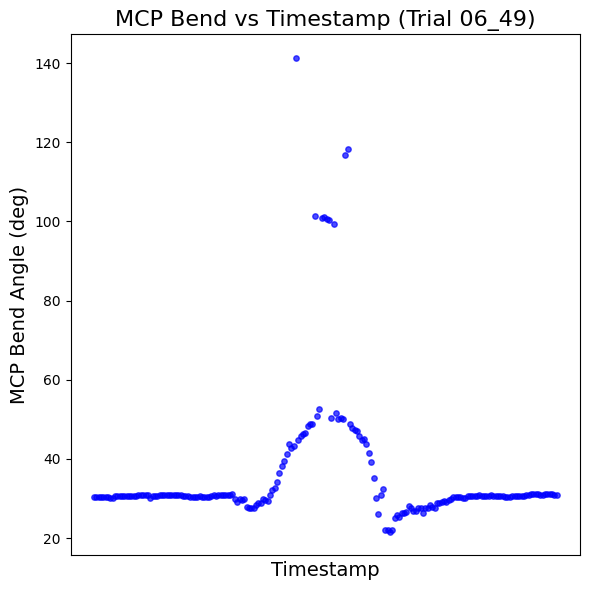

In [154]:
# Plot MCP Bend Angles Calculated from Camera Data vs Camera Timestamp
plt.figure(figsize=(6,6))
plt.scatter(
    cam.df[("ts_25183199", "", "")], 
    cam.df[("metric", "mcp_bend_deg", "deg")],
    s=15, alpha=0.7, color="blue"  # set dots to blue
)

plt.xlabel("Timestamp", fontsize=14)  # bigger label font
plt.ylabel("MCP Bend Angle (deg)", fontsize=14)

plt.title(f"MCP Bend vs Timestamp (Trial {trial_string})", fontsize=16)  # bigger title font

# Remove x ticks completely
plt.xticks([])

plt.tight_layout()
plt.savefig(os.path.join(temp_save_dir, "MCP Bend vs timestamp.png"), dpi=300, bbox_inches='tight')
plt.show()


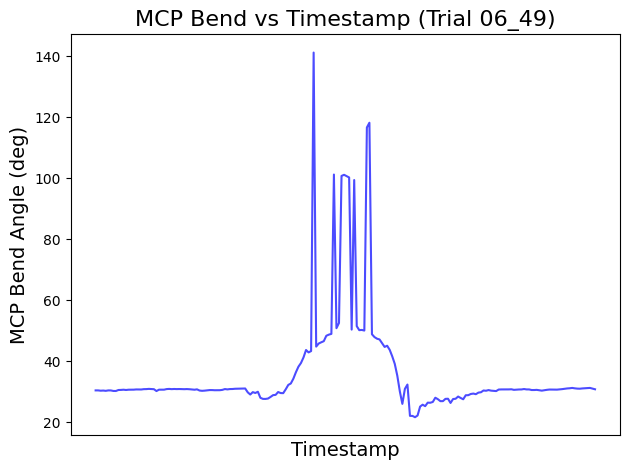

In [155]:
plt.plot(
    cam.df[("ts_25183199", "", "")], 
    cam.df[("metric", "mcp_bend_deg", "deg")], alpha=0.7, color="blue"  # set dots to blue
)


plt.xlabel("Timestamp", fontsize=14)  # bigger label font
plt.ylabel("MCP Bend Angle (deg)", fontsize=14)

plt.title(f"MCP Bend vs Timestamp (Trial {trial_string})", fontsize=16)  # bigger title font

# Remove x ticks completely
plt.xticks([])

plt.tight_layout()
plt.savefig(os.path.join(temp_save_dir, "MCP Bend vs timestamp.png"), dpi=300, bbox_inches='tight')
plt.show()


In [156]:
df_renc.head()

,timestamp,raw,volts,angle
0,124130755598,14229,2.667937,-2.616966
1,124130781217,14279,2.677313,-2.039737
2,124130806988,14267,2.675063,-2.178272
3,124130829909,14274,2.676375,-2.097460
4,124130852733,14263,2.674313,-2.224450


In [157]:
cam.df[("ts_25183199", "", "")]

0      130658831414
1      130658880799
2      130658930230
3      130658980894
4      130659030742
           ...     
193    130708605661
194    130708658894
195    130708706279
196    130708756536
197    130708806923
Name: (ts_25183199, , ), Length: 198, dtype: object

In [158]:
df_renc["timestamp"]

0      124130755598
1      124130781217
2      124130806988
3      124130829909
4      124130852733
           ...     
448    124140641817
449    124140663272
450    124140684850
451    124140706389
452    124140728458
Name: timestamp, Length: 453, dtype: int64

## Align Timestamps 

In [159]:
cam.find_matching_indices(
    encoder_df=df_renc,
    cam_time_col=("ts_25183199", "", ""),  # or "ts_25183199"
    enc_time_col="timestamp",

    #--------------- set a timestamp difference threshold here ------------------
    
    tolerance="1000ms",     # <-- was 10000; use an explicit window for clarity

    #--------------- set a timestamp difference threshold here ------------------
    
    direction="nearest",
)

cam.attach_encoder_using_match(
    encoder_df=df_renc,
    columns=None,
    suffix="_renc",
    keep_time_delta=True,
    drop_unmatched=True,
)


[find_matching_indices] Dropping 0 camera rows with NaT timestamps.
[find_matching_indices] Dropping 0 encoder rows with NaT timestamps.
[debug] cam range: 0 days 13:06:58.831414 → 0 days 13:07:08.806923
[debug] enc range: 0 days 12:41:30.755598 → 0 days 12:41:40.728458
[debug] probe |delta| (ms) stats: count    2.200000e+01
mean     1.522879e+06
std      2.963253e+03
min      1.518103e+06
25%      1.520482e+06
50%      1.522865e+06
75%      1.525287e+06
max      1.527679e+06
Name: delta_ms, dtype: float64


/Users/phily/Developer/sensorimotor-lab/Strain-Sensor-/Code/analysis/analysis.py:249: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8")
/Users/phily/Developer/sensorimotor-lab/Strain-Sensor-/Code/analysis/analysis.py:250: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  enc_small["_t_enc_ns"] = enc_small["t_enc_td"].view("i8")


RuntimeError: No matches stored. Run find_matching_indices(...) first.

In [ ]:
# Create a smaller dataframe keeping only columns for following:

cols_to_keep = [
    ("ts_25183199", "", ""),  # camera timestamp
    "angle_renc",   
    ("metric", "mcp_bend_deg", "deg"),
    ("metric", "wrist_bend_deg", "deg"),
    "time_delta_renc",  # time difference between camera and rot enc timestamps
]
small_df = cam.df[cols_to_keep].copy()
small_df = small_df.dropna(subset=[("metric", "mcp_bend_deg", "deg")])
small_df = small_df.loc[:, ~small_df.columns.duplicated()].copy()


In [ ]:
# Count how many remaining datapoints left  in MCP Bend Angle  after NaN removal from timestamped matched dataframe 

# Count NaNs
remain = len(small_df)

# Count total rows
total_rows = len(cam.df)

# Print results
print(f"Rows after timestamp matching: {total_rows} rows")
print(f"Rows after dropping NaN's in MCP Bend Angle: {remain} rows")

Rows after timestamp matching: 198 rows
Rows after dropping NaN's in MCP Bend Angle: 198 rows


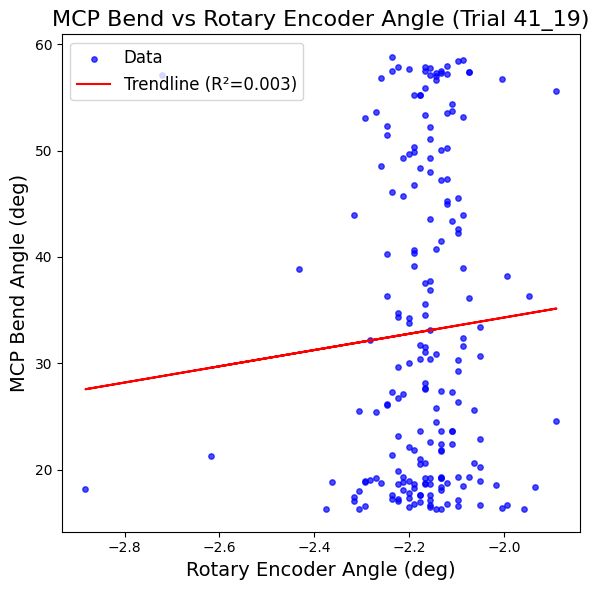

In [ ]:
rot_angles = small_df["angle_renc"].to_numpy()
mcp_angles = small_df[("metric", "mcp_bend_deg", "deg")].to_numpy()

# Fit linear regression (y = m*x + b)
m, b = np.polyfit(rot_angles, mcp_angles, 1)
y_pred = m * rot_angles + b

# Compute R²
ss_res = np.sum((mcp_angles - y_pred) ** 2)
ss_tot = np.sum((mcp_angles - np.mean(mcp_angles)) ** 2)        
r2 = 1 - (ss_res / ss_tot)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(rot_angles, mcp_angles, s=15, alpha=0.7, color="blue", label="Data")  # blue dots
plt.plot(rot_angles, y_pred, color="red", label=f"Trendline (R²={r2:.3f})")

plt.xlabel("Rotary Encoder Angle (deg)", fontsize=14)  # bigger labels
plt.ylabel("MCP Bend Angle (deg)", fontsize=14)
plt.title(f"MCP Bend vs Rotary Encoder Angle (Trial {trial_string})", fontsize=16)

plt.grid(False)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig(os.path.join(temp_save_dir, "MCP Bend vs rot enc.png"), dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
small_df.columns

Index([            ('ts_25183199', '', ''),
                              'angle_renc',
         ('metric', 'mcp_bend_deg', 'deg'),
       ('metric', 'wrist_bend_deg', 'deg'),
                         'time_delta_renc'],
      dtype='object')

In [ ]:
small_df[('metric', 'mcp_bend_deg', 'deg')]

0      21.254794
1      20.490203
2      18.614770
3      16.906853
4      16.742500
         ...    
193    57.477770
194    57.426922
195    57.241449
196    57.266446
197    57.024636
Name: (metric, mcp_bend_deg, deg), Length: 198, dtype: float64

# DLC data (MCP) vs Rotenc (Ground Truth)

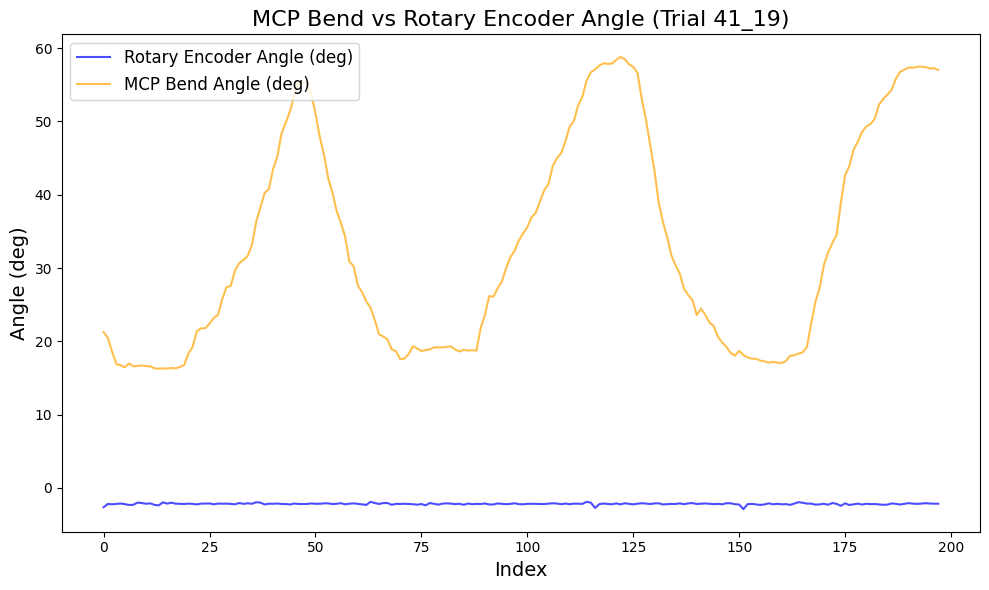

In [ ]:
# Plotting DLC vs Rotary Encoder over time/index (RAW)

assert len(rot_angles) == len(mcp_angles)

# --- Plot both angles over index ---
plt.figure(figsize=(10,6))
plt.plot(rot_angles, label="Rotary Encoder Angle (deg)", color="blue", alpha=0.7)
plt.plot(mcp_angles, label="MCP Bend Angle (deg)", color="orange", alpha=0.7)
plt.xlabel("Index", fontsize=14)  # bigger label font
plt.ylabel("Angle (deg)", fontsize=14)
plt.title(f"MCP Bend vs Rotary Encoder Angle (Trial {trial_string})", fontsize=16)  # bigger title font
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig(os.path.join(temp_save_dir, "MCP Bend vs rot enc over index.png"), dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# enforce rotary encoder's first time stamp to be zero, and flip sign of all values
rot_angles_tared = - (rot_angles - rot_angles[0])
if signed_angles:
    mcp_angles_tared = - (mcp_angles - mcp_angles[0])
else:
    mcp_angles_tared = mcp_angles - mcp_angles[0]

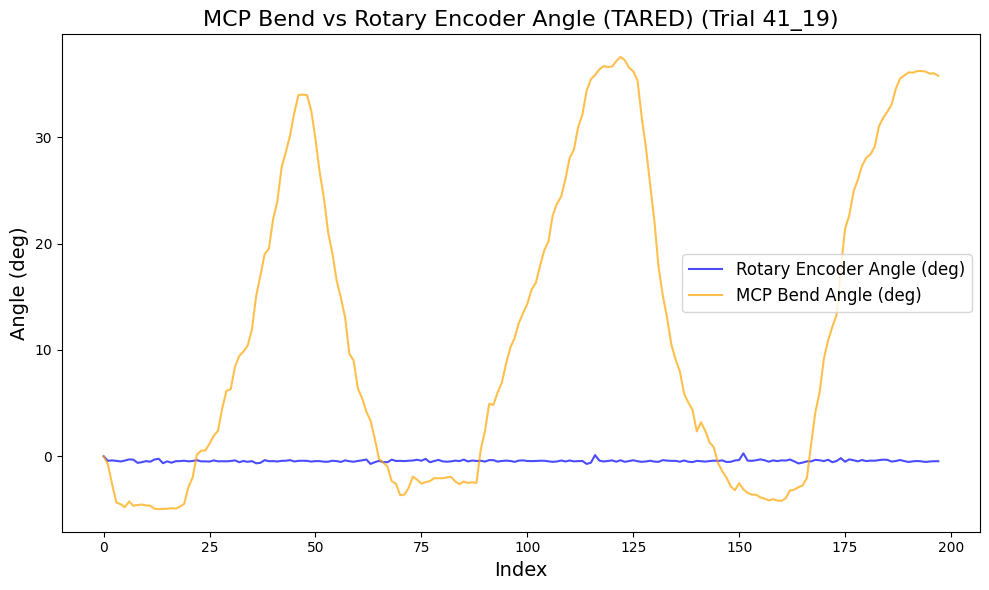

In [ ]:
# Plotting DLC vs Rotary Encoder over time/index (RAW)

assert len(rot_angles) == len(mcp_angles)

# --- Plot both angles over index ---
plt.figure(figsize=(10,6))
plt.plot(rot_angles_tared, label="Rotary Encoder Angle (deg)", color="blue", alpha=0.7)
plt.plot(mcp_angles_tared, label="MCP Bend Angle (deg)", color="orange", alpha=0.7)
plt.xlabel("Index", fontsize=14)  # bigger label font
plt.ylabel("Angle (deg)", fontsize=14)
plt.title(f"MCP Bend vs Rotary Encoder Angle (TARED) (Trial {trial_string})", fontsize=16)  # bigger title font
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig(os.path.join(temp_save_dir, "MCP Bend vs rot enc over index tared.png"), dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# calculate absolute angle error between tared rotary encoder and tared mcp bend angle
angle_error = np.abs(rot_angles_tared - mcp_angles_tared)
mean_error = np.mean(angle_error)
std_error = np.std(angle_error)
print("Absolute Angle Error:")
print("Mean error: ", mean_error)
print("Standard deviation: ", std_error)

Absolute Angle Error:
Mean error:  14.018733805680856
Standard deviation:  12.968571360925097


## Calculate Angular Error excluding peaks

In [ ]:
# calculate absolute angle error between tared rotary encoder and tared mcp bend angle, BUT only for segments between peaks
from scipy.signal import find_peaks
peaks, _ = find_peaks(rot_angles_tared, height=50, distance=5)  # adjust height and distance as needed
valleys, _ = find_peaks(-rot_angles_tared, height=0, distance=10)  # invert signal to find valleys
# valleys = []
peaks, valleys

(array([], dtype=int64),
 array([  4,  14,  25,  36,  52,  63,  77,  97, 114, 127, 139, 153, 164,
        175, 194]))

In [ ]:
exclude_range_for_trials = {
    "24_57": 10, # also change peak range to +6 in plt.axvspan(p-exclude_range, p+exclude_range+6, color='grey', alpha=0.5) for the below two cells
    "29_07": 10,
    "31_23": 5,
    "33_22": 2,
    "35_22": 2,
    "37_05": 1
}

exclude_range = exclude_range_for_trials[trial_string]

KeyError: '41_19'

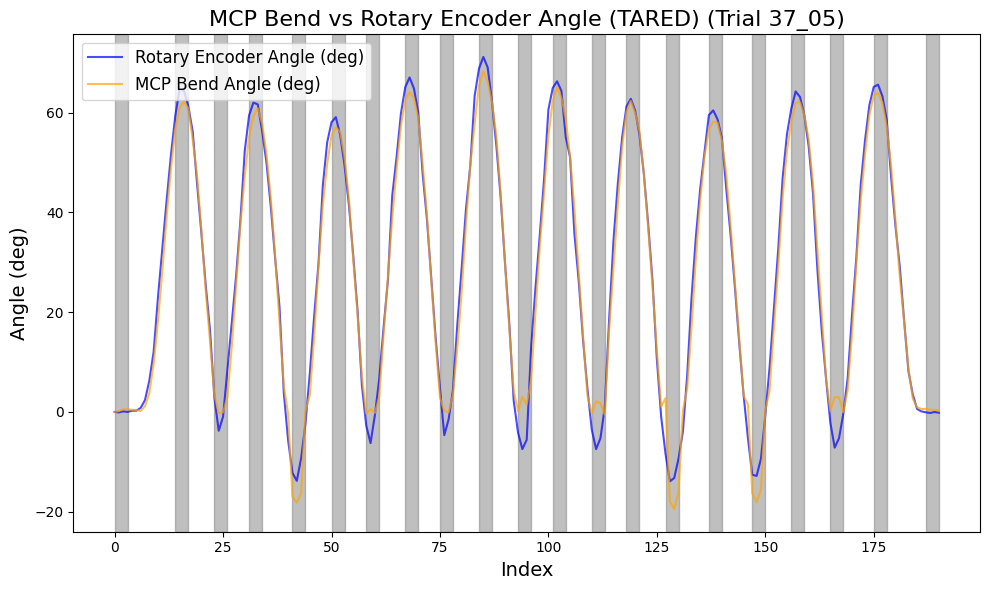

In [ ]:
# produce the same graph but shade green between peaks and valleys (also omit 5 indices around peaks/valleys)
plt.figure(figsize=(10,6))
plt.plot(rot_angles_tared, label="Rotary Encoder Angle (deg)", color="blue", alpha=0.7)
plt.plot(mcp_angles_tared, label="MCP Bend Angle (deg)", color="orange", alpha=0.7)
plt.xlabel("Index", fontsize=14)  # bigger label font
plt.ylabel("Angle (deg)", fontsize=14)
plt.title(f"MCP Bend vs Rotary Encoder Angle (TARED) (Trial {trial_string})", fontsize=16)  # bigger title font
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("MCP Bend vs rot enc over index.png", dpi=300, bbox_inches='tight')

for p in peaks:
    plt.axvspan(p-exclude_range, p+exclude_range+1, color='grey', alpha=0.5)  # omit 5 indices around peak
for v in valleys:
    plt.axvspan(v-exclude_range, v+exclude_range+1, color='grey', alpha=0.5)  # omit 5 indices around valley

plt.savefig(os.path.join(temp_save_dir, "MCP Bend vs rot enc over index tared shaded.png"), dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Angular error only between peaks and valleys (excluding 5 indices around peaks/valleys)
valid_indices = np.ones(len(rot_angles_tared), dtype=bool)
for p in peaks:
    valid_indices[max(0, p-exclude_range):min(len(rot_angles_tared), p+exclude_range+1)] = False  # exclude 5 indices around peak
for v in valleys:
    valid_indices[max(0, v-exclude_range):min(len(rot_angles_tared), v+exclude_range+1)] = False  # exclude 5 indices around valley
angle_error_peaks_valleys = angle_error[valid_indices]
mean_error_pv = np.mean(angle_error_peaks_valleys)
std_error_pv = np.std(angle_error_peaks_valleys)
print("Absolute Angle Error excluding shaded regions:")
print("Mean error: ", mean_error_pv)
print("Standard deviation: ", std_error_pv)


Absolute Angle Error excluding shaded regions:
Mean error:  2.2601456540949005
Standard deviation:  1.7155884067095648


In [ ]:
# indices of tared MCP bend angles that are negative
np.sum(mcp_angles_tared < 0)
np.where(mcp_angles_tared < 0)[0]

array([ 24,  25,  40,  41,  42,  43,  58,  60,  77, 110, 113, 128, 129,
       130, 147, 148, 149, 168])

In [ ]:
# print values at negative indices
mcp_angles_tared[np.where(mcp_angles_tared < 0)[0]]

array([ -0.25619494,  -0.04752407,  -0.34434555, -16.99236768,
       -18.21853926, -16.21613547,  -0.32775586,  -0.18904589,
        -0.06998342,  -0.29664234,  -0.58000616, -17.95502242,
       -19.47541748, -16.01657939, -16.35963295, -18.05391927,
       -15.62377693,  -0.06605212])

In [ ]:
# get camera timestamps list
cam.df[("ts_25183199", "", "")]

0      183711125116
1      183711173552
2      183711226773
3      183711277172
4      183711324910
           ...     
194    183720904685
195    183720951743
196    183721012779
197    183721052240
198    183721105458
Name: (ts_25183199, , ), Length: 199, dtype: object

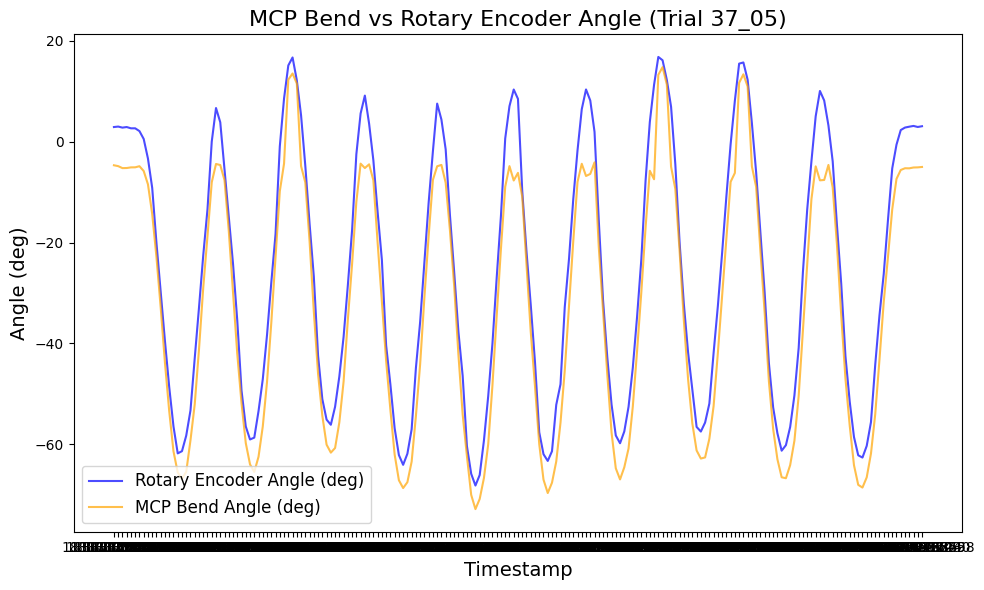

In [ ]:
# --- Plot both angles over time (using camera timestamps) ---
plt.figure(figsize=(10,6))
plt.plot(small_df[("ts_25183199", "", "")], rot_angles, label="Rotary Encoder Angle (deg)", color="blue", alpha=0.7)
plt.plot(small_df[("ts_25183199", "", "")], mcp_angles, label="MCP Bend Angle (deg)", color="orange", alpha=0.7)
plt.xlabel("Timestamp", fontsize=14)  # bigger label font
plt.ylabel("Angle (deg)", fontsize=14)
plt.title(f"MCP Bend vs Rotary Encoder Angle (Trial {trial_string})", fontsize=16)  # bigger title font
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("MCP Bend vs rot enc over time.png", dpi=300, bbox_inches='tight')
plt.show()

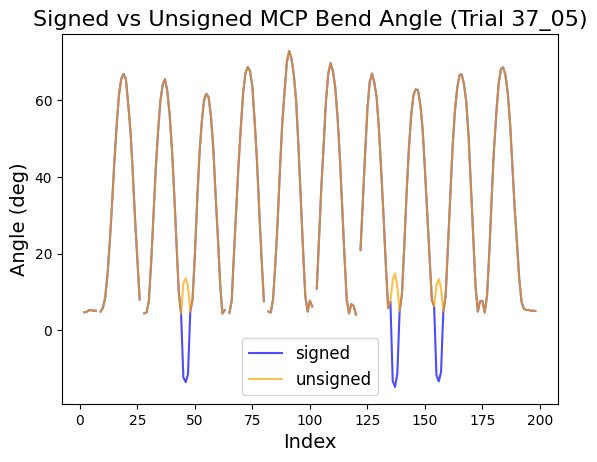

In [ ]:
# debugging signed vs unsigned angle calculation accuracy
angles_mcp_signed = - cam.angle_from_vectors(v1_mcp, v2_mcp, signed=True, ref=np.array([0,0,1]))
angles_mcp_unsigned = cam.angle_from_vectors(v1_mcp, v2_mcp)

plt.plot(angles_mcp_signed, label="signed", color="blue", alpha=0.7)
plt.plot(angles_mcp_unsigned, label="unsigned", color="orange", alpha=0.7)
plt.xlabel("Index", fontsize=14)  # bigger label font
plt.ylabel("Angle (deg)", fontsize=14)
plt.title(f"Signed vs Unsigned MCP Bend Angle (Trial {trial_string})", fontsize=16)  # bigger title font
plt.legend(fontsize=12)
plt.grid(False)

# Save figures and stats

In [ ]:
from PIL import Image, ImageDraw, ImageFont

# Load previously saved figures

MCP_time = Image.open(os.path.join(temp_save_dir, "MCP Bend vs timestamp.png"))
MCP_rot = Image.open(os.path.join(temp_save_dir, "MCP Bend vs rot enc.png"))
MCP_rot_index = Image.open(os.path.join(temp_save_dir, "MCP Bend vs rot enc over index.png"))
MCP_rot_index_tared = Image.open(os.path.join(temp_save_dir, "MCP Bend vs rot enc over index tared.png"))
MCP_rot_index_tared_shaded = Image.open(os.path.join(temp_save_dir, "MCP Bend vs rot enc over index tared shaded.png"))

# Decide layout
width = MCP_time.width + MCP_rot.width + MCP_rot_index.width + MCP_rot_index_tared.width + MCP_rot_index_tared_shaded.width
height = max(MCP_time.height, MCP_rot.height, MCP_rot_index.height, MCP_rot_index_tared.height, MCP_rot_index_tared_shaded.height) + 400  # extra space for stats

# Create a blank canvas
summary = Image.new("RGB", (width, height), "white")

# Add stats text
draw = ImageDraw.Draw(summary)
font_size = 120
font = ImageFont.truetype('/Library/Fonts/Arial.ttf', size=font_size)
stats_text = f"Trial {trial_string}:\nAbsolute Angle Error (DLC vs RotEnc): Mean={mean_error}  |  Std={std_error}            Excluding Shaded Region:   Mean={mean_error_pv}  |  Std={std_error_pv}\n"
draw.text((200, 50), stats_text, fill="black", font=font)

# Paste plots
summary.paste(MCP_time, (0, 350))
summary.paste(MCP_rot, (MCP_time.width, 350))
summary.paste(MCP_rot_index, (MCP_time.width + MCP_rot.width, 350))
summary.paste(MCP_rot_index_tared, (MCP_time.width + MCP_rot.width + MCP_rot_index.width, 350))
summary.paste(MCP_rot_index_tared_shaded, (MCP_time.width + MCP_rot.width + MCP_rot_index.width + MCP_rot_index_tared.width, 350))


summary.save(os.path.join(temp_save_dir, f"trial_{trial_string}_summary.png"))
summary.show()


In [ ]:
first_timestamp = small_df[("ts_25183199", "", "")].iloc[0]
last_timestamp = small_df[("ts_25183199", "", "")].iloc[-1]
print(f"First timestamp: {first_timestamp}")
print(f"Last timestamp: {last_timestamp}")

First timestamp: 183711226773
Last timestamp: 183721105458
